In [1]:
# Generate a dataset

# Fit three classifiers

# To make a prediction - pick max 

In [383]:
from lab_utils import plot_data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from matplotlib.ticker import MaxNLocator


Dữ liệu  loại hoa Iris (Iris setosa, Iris versicolor, và Iris virginica) <br /> 
Chiều dài và chiều rộng của đài hoa (sepal length và sepal width), chiều dài và chiều rộng của cánh hoa (petal length và petal width).

In [1051]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target


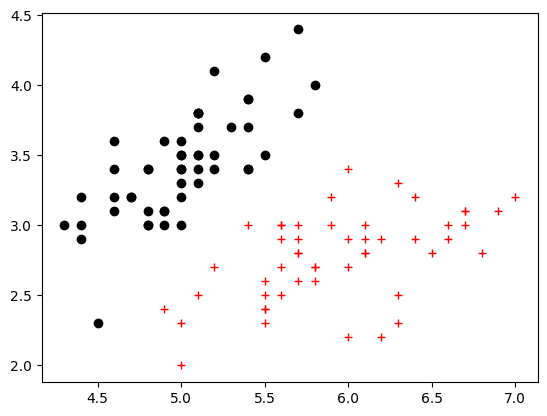

In [1052]:
plot_data(X,y)

$$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}} $$


$$ \text{softmax}(z_i) = \frac{e^{z_i - z_{\text{max}}}}{\sum_{j=1}^{n} e^{z_j - z_{\text{max}}}} $$

$$ \frac{e^{z_i - z_{\text{max}}}}{\sum_{j=1}^{n} e^{z_j - z_{\text{max}}}} = \frac{e^{z_i}}{e^{z_{\text{max}}} \sum_{j=1}^{n} e^{z_j - z_{\text{max}}}} = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}} $$

In [1039]:

def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

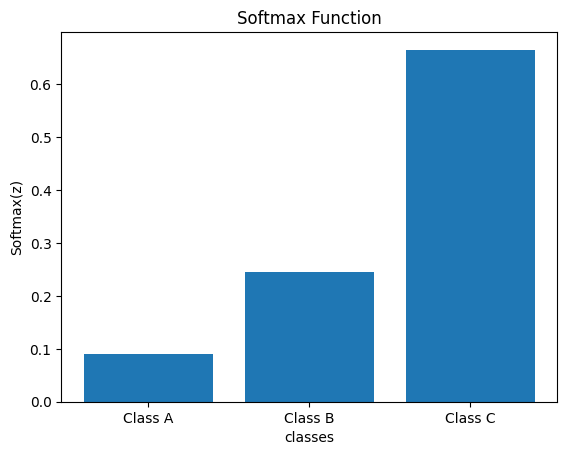

In [1040]:
z = [1.0, 2.0, 3.0]
softmax_values = softmax(z)
class_labels = ["Class A", "Class B", "Class C"]
plt.bar(class_labels, softmax_values)
plt.title('Softmax Function')
plt.xlabel('classes')
plt.ylabel('Softmax(z)') 
plt.show()

In [1041]:
def shuffle_data(X, y):
   N, _ = X.shape
   shuffled_idx = np.random.permutation(N)

   return X[shuffled_idx], y[shuffled_idx].T

In [1042]:
def one_hot(y):
   return pd.get_dummies(y, dtype=int).values

In [1043]:
def cross_entroy(Y, A):
    cost = -np.sum(Y * np.log(A)) 
    return cost

In [1044]:
y = one_hot(y)

In [1045]:
# class SoftmaxRegression() : 
#     def __init__( self, learning_rate, epoch ) :         
#         self.learning_rate = learning_rate         
#         self.epoch = epoch 
#         self.losses = []
#         self.acc = []
        
   #  def predict(self, X):
   #      Z = np.dot(self.W, X.T) + self.b
   #      A = softmax(Z)
   #      return np.argmax(A, axis=0)
    
#     def get_accuracy(self, X, y):
#         y_pred = self.predict(X)
#         return np.mean(y_pred == np.argmax(y, axis=1))
    
#     def fit( self, X, y) :         
#         self.m = X.shape[0]                
#         self.W = np.random.randn(3, 3)        
#         self.b = np.zeros((3, 1))

#         for e in range(self.epoch):
#             loss = 0
#             X, y = shuffle_data(X, y)
#             for i in range(self.m):
#                 x = X[i].reshape(1, 3)
#                 lb = y[i].reshape(3, 1)
#                 Z = np.dot(self.W, x.T) + self.b
#                 A = softmax(Z)
#                 DZ = A - lb
#                 DW = np.dot(DZ, x)
#                 db = DZ
                
#                 self.W = self.W - self.learning_rate * DW
#                 self.b = self.b - self.learning_rate * db
#                 loss += cross_entroy(lb, A)

#             loss/=self.m
#             print('Loss at epoch {}: {}, acc{:.2f}'.format(e, loss, self.get_accuracy(X, y)))   
#             self.losses.append(loss)
#             self.acc.append(self.get_accuracy(X, y))
#         return self
#     def show_loss(self):
#         plt.figure(figsize=(12, 5))
#         plt.subplot(121)
#         plt.plot(self.losses, color='orange')
#         plt.title('Loss')
#         plt.xlabel('Epoch')
#         plt.ylabel('Loss')
#         plt.subplot(122)
#         plt.plot(self.acc)
#         plt.title('Loss')
#         plt.xlabel('Epoch')
#         plt.ylabel('Loss')
#         plt.show()
        
    

    

In [1046]:
print("Kich thuoc du lieu dau vao: ", X.shape)  
print("Kich thuoc label dau vao: ", y.shape)

Kich thuoc du lieu dau vao:  (150, 2)
Kich thuoc label dau vao:  (150, 3)


In [1058]:
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / exp_Z.sum(axis=0, keepdims=True)

def compute_cost(Y, A):
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    # Tính cross-entropy loss
    loss = -np.sum(Y * np.log(A), axis=-1)
    # Trả về giá trị trung bình
    return np.mean(loss)

class SoftmaxRegression:
    def __init__(self, learning_rate=0.001, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.losses = []

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.k = len(np.unique(y))  # số lượng lớp
        self.W = np.zeros((self.k, self.n))
        self.b = np.zeros((self.k,))
        
        # Chuyển đổi y thành one-hot encoded
        y_one_hot = one_hot(y)
        
        for epoch in range(self.iterations):
            shuffled_x, shuffled_y = shuffle_data(X, y_one_hot)

            # Forward propagation
            Z = np.dot(self.W, shuffled_x.T) + self.b[:, np.newaxis]
         
            A = softmax(Z)
                
            # Backward propagation
            dZ = A - shuffled_y
            
            dW = 1 / self.m * np.dot(dZ, shuffled_x)
            db = 1 / self.m * np.sum(dZ, axis=1)
            
            # Update parameters
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            
            # Compute cost
            avg_loss = compute_cost(shuffled_y, A)
            self.losses.append(avg_loss)

            print(f"Epoch {epoch}, loss {avg_loss:.4f}, acc {self.get_accuracy(X, y)}")
    
        return self

    def show_loss(self):
        plt.plot(self.losses)
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
        
    def get_accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    def predict(self, X):
        Z = np.dot(self.W , X.T) + self.b[:, np.newaxis]
        A = softmax(Z)
        return np.argmax(A, axis=0)

Epoch 0, loss 54.9306, acc 0.3333333333333333
Epoch 1, loss 54.3992, acc 0.3333333333333333
Epoch 2, loss 53.9494, acc 0.3333333333333333
Epoch 3, loss 53.5260, acc 0.36
Epoch 4, loss 53.1162, acc 0.4066666666666667
Epoch 5, loss 52.7164, acc 0.54
Epoch 6, loss 52.3255, acc 0.5733333333333334
Epoch 7, loss 51.9431, acc 0.6
Epoch 8, loss 51.5688, acc 0.6466666666666666
Epoch 9, loss 51.2026, acc 0.6466666666666666
Epoch 10, loss 50.8441, acc 0.6533333333333333
Epoch 11, loss 50.4934, acc 0.66
Epoch 12, loss 50.1501, acc 0.66
Epoch 13, loss 49.8141, acc 0.66
Epoch 14, loss 49.4852, acc 0.66
Epoch 15, loss 49.1634, acc 0.66
Epoch 16, loss 48.8483, acc 0.66
Epoch 17, loss 48.5399, acc 0.66
Epoch 18, loss 48.2380, acc 0.66
Epoch 19, loss 47.9425, acc 0.66
Epoch 20, loss 47.6532, acc 0.66
Epoch 21, loss 47.3699, acc 0.66
Epoch 22, loss 47.0925, acc 0.66
Epoch 23, loss 46.8209, acc 0.66
Epoch 24, loss 46.5548, acc 0.66
Epoch 25, loss 46.2943, acc 0.66
Epoch 26, loss 46.0391, acc 0.66
Epoch 27

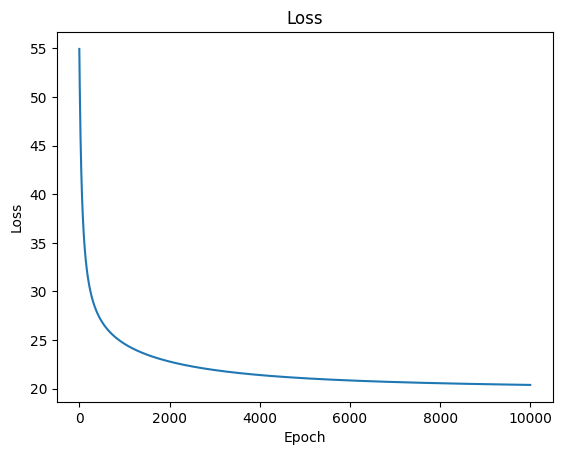

In [1059]:
model = SoftmaxRegression(learning_rate=0.1, iterations=10000).fit(X, y )
model.show_loss()